<a href="https://colab.research.google.com/github/Mostafizur979/Artificial-Intelligence-Lab/blob/main/AI_Lab_7_classifiers_with_credit_card_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Artificial Intelligence/credit card.csv')

In [4]:
df.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
19944,19945,500000.0,2,1,2,34.0,-1,-1,-1,-1,...,31188.0,5827.0,3637.0,6187.0,4775.0,31188.0,0.0,4119.0,7390.0,0
25588,25589,80000.0,2,2,1,37.0,0,0,0,0,...,45458.0,48679.0,49895.0,5000.0,3000.0,2000.0,4000.0,2000.0,2000.0,0
2200,2201,140000.0,2,1,2,30.0,2,-1,-1,-1,...,1710.0,0.0,6096.0,4593.0,4705.0,1710.0,0.0,6096.0,0.0,1
17838,17839,110000.0,1,2,2,25.0,0,0,2,0,...,34222.0,44062.0,45036.0,4000.0,0.0,9000.0,10700.0,1700.0,0.0,1
20382,20383,50000.0,1,2,2,23.0,0,0,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16348,16349,500000.0,2,1,2,34.0,-2,-2,-2,-2,...,-83.0,49699.0,3821.0,6648.0,11986.0,0.0,49947.0,3840.0,11939.0,0
24812,24813,30000.0,1,3,1,42.0,0,0,-1,-1,...,390.0,390.0,0.0,1000.0,390.0,390.0,390.0,0.0,780.0,0
26347,26348,240000.0,2,2,2,28.0,2,2,2,2,...,253679.0,232300.0,212749.0,0.0,22550.0,0.0,8450.0,7800.0,6975.0,0
3386,3387,360000.0,1,1,2,29.0,-1,-1,-1,-1,...,969.0,2500.0,0.0,6159.0,1870.0,969.0,2500.0,0.0,0.0,0
16926,16927,90000.0,1,3,2,50.0,0,0,0,0,...,60177.0,54440.0,45788.0,3451.0,3243.0,2390.0,1840.0,1690.0,1954.0,0


In [5]:
df.shape

(30000, 25)

In [6]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                           float64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
features= df.columns

In [11]:
X=df.iloc[:,0:24]

In [12]:
X.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [13]:
y=df.iloc[:,[24]]
y.columns

Index(['default.payment.next.month'], dtype='object')

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Decision Tree Classifier

Train data accuracy: 1.0
Test data accuracy: 0.7225
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4669
           1       0.38      0.41      0.40      1331

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



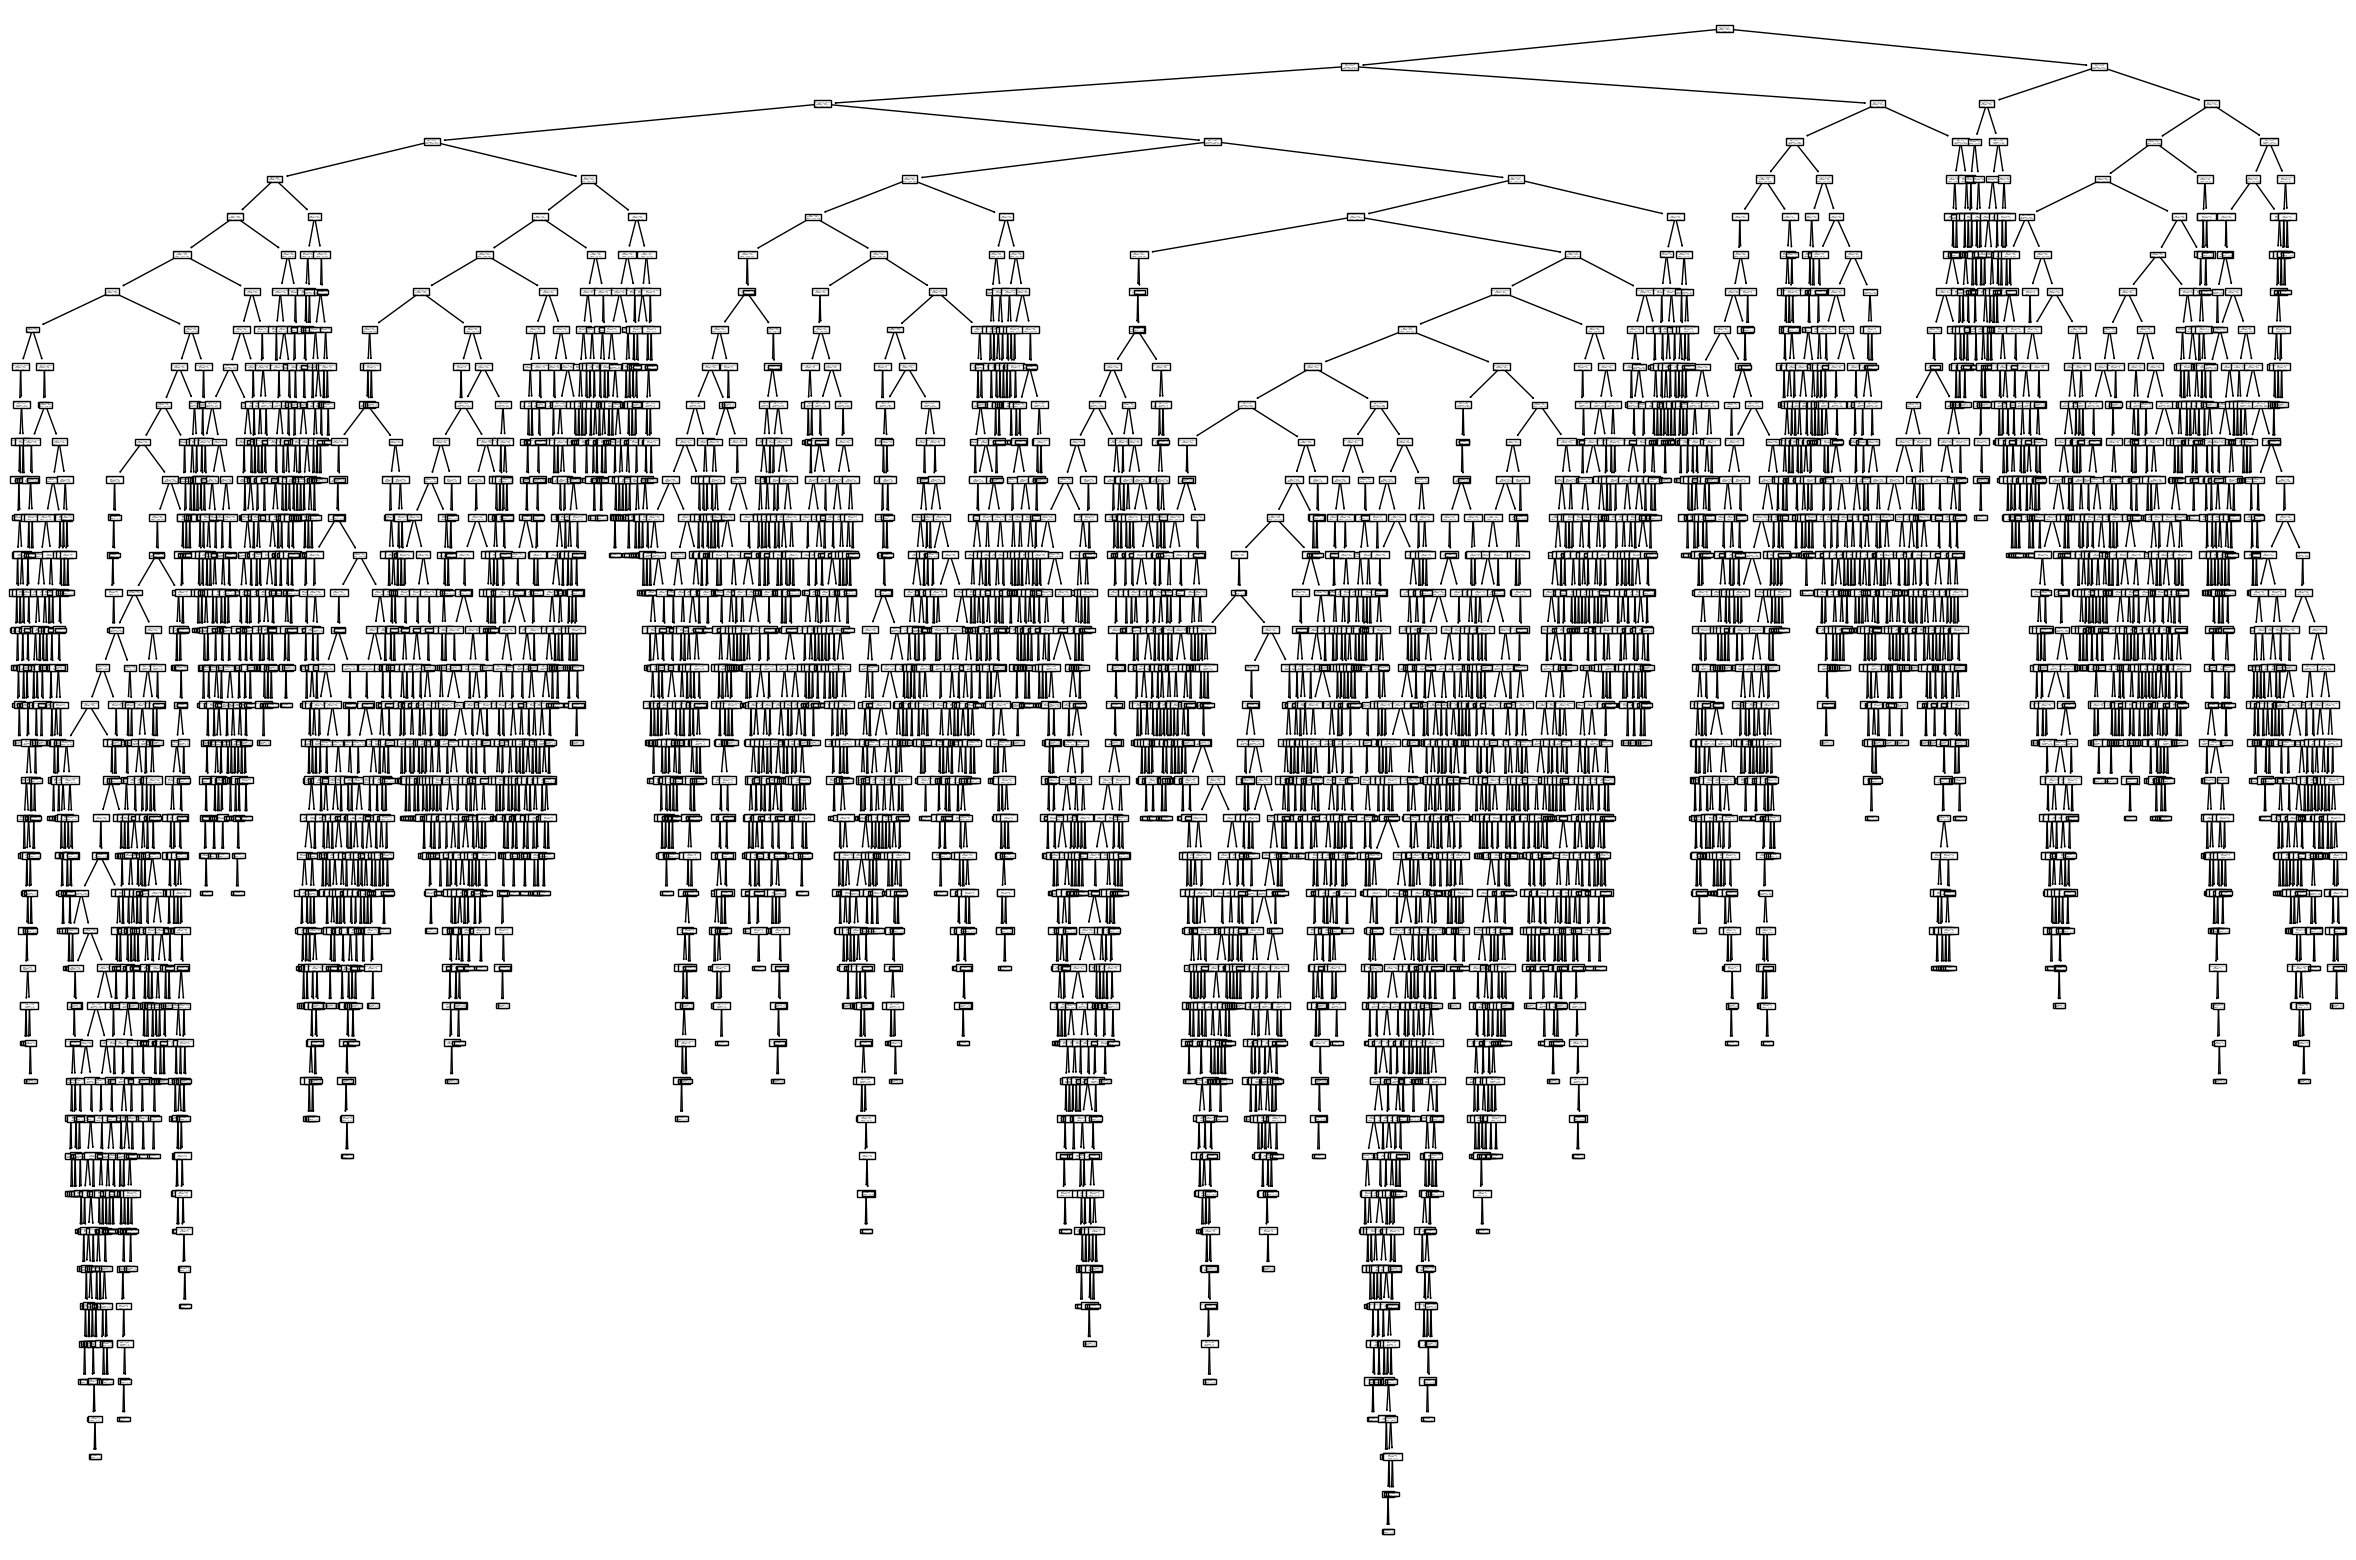

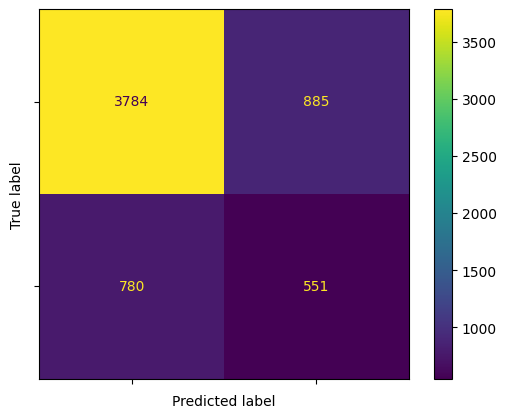

In [30]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() #training
dtree.fit(X_train,y_train)


plt.figure(figsize=(30, 20))
tree.plot_tree(dtree, feature_names = features) #plotting the decision tree

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = dtree.predict(X_test)))


c1=classification_report(y_test, dtree.predict(X_test))
print(c1)


confusion_matrix = metrics.confusion_matrix(y_test, dtree.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [])
cm_display.plot()
plt.show()

# KNeighbors Classifier

In [15]:
import warnings
warnings.filterwarnings("ignore")

Train data accuracy: 0.8161930160846738
Test data accuracy: 0.7436666666666667
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      4669
           1       0.34      0.17      0.23      1331

    accuracy                           0.74      6000
   macro avg       0.57      0.54      0.54      6000
weighted avg       0.69      0.74      0.71      6000



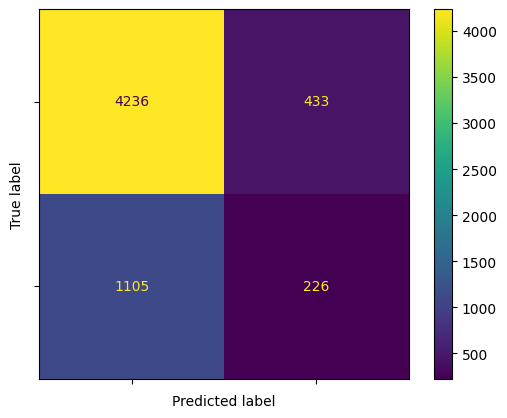

In [16]:
#KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = knn.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = knn.predict(X_test)))


c1=classification_report(y_test, knn.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()



# Logistic Regression

Train data accuracy: 0.7788982415201267
Test data accuracy: 0.7781666666666667
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4669
           1       0.00      0.00      0.00      1331

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



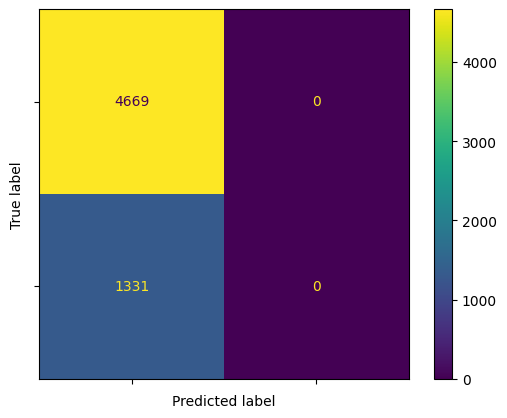

In [17]:
#Logistic Regression

from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = logr.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = logr.predict(X_test)))


c1=classification_report(y_test, logr.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, logr.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()

# Bagging Classifier

Train data accuracy: 0.9866655554629552
Test data accuracy: 0.8008333333333333
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4669
           1       0.59      0.34      0.43      1331

    accuracy                           0.80      6000
   macro avg       0.71      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000



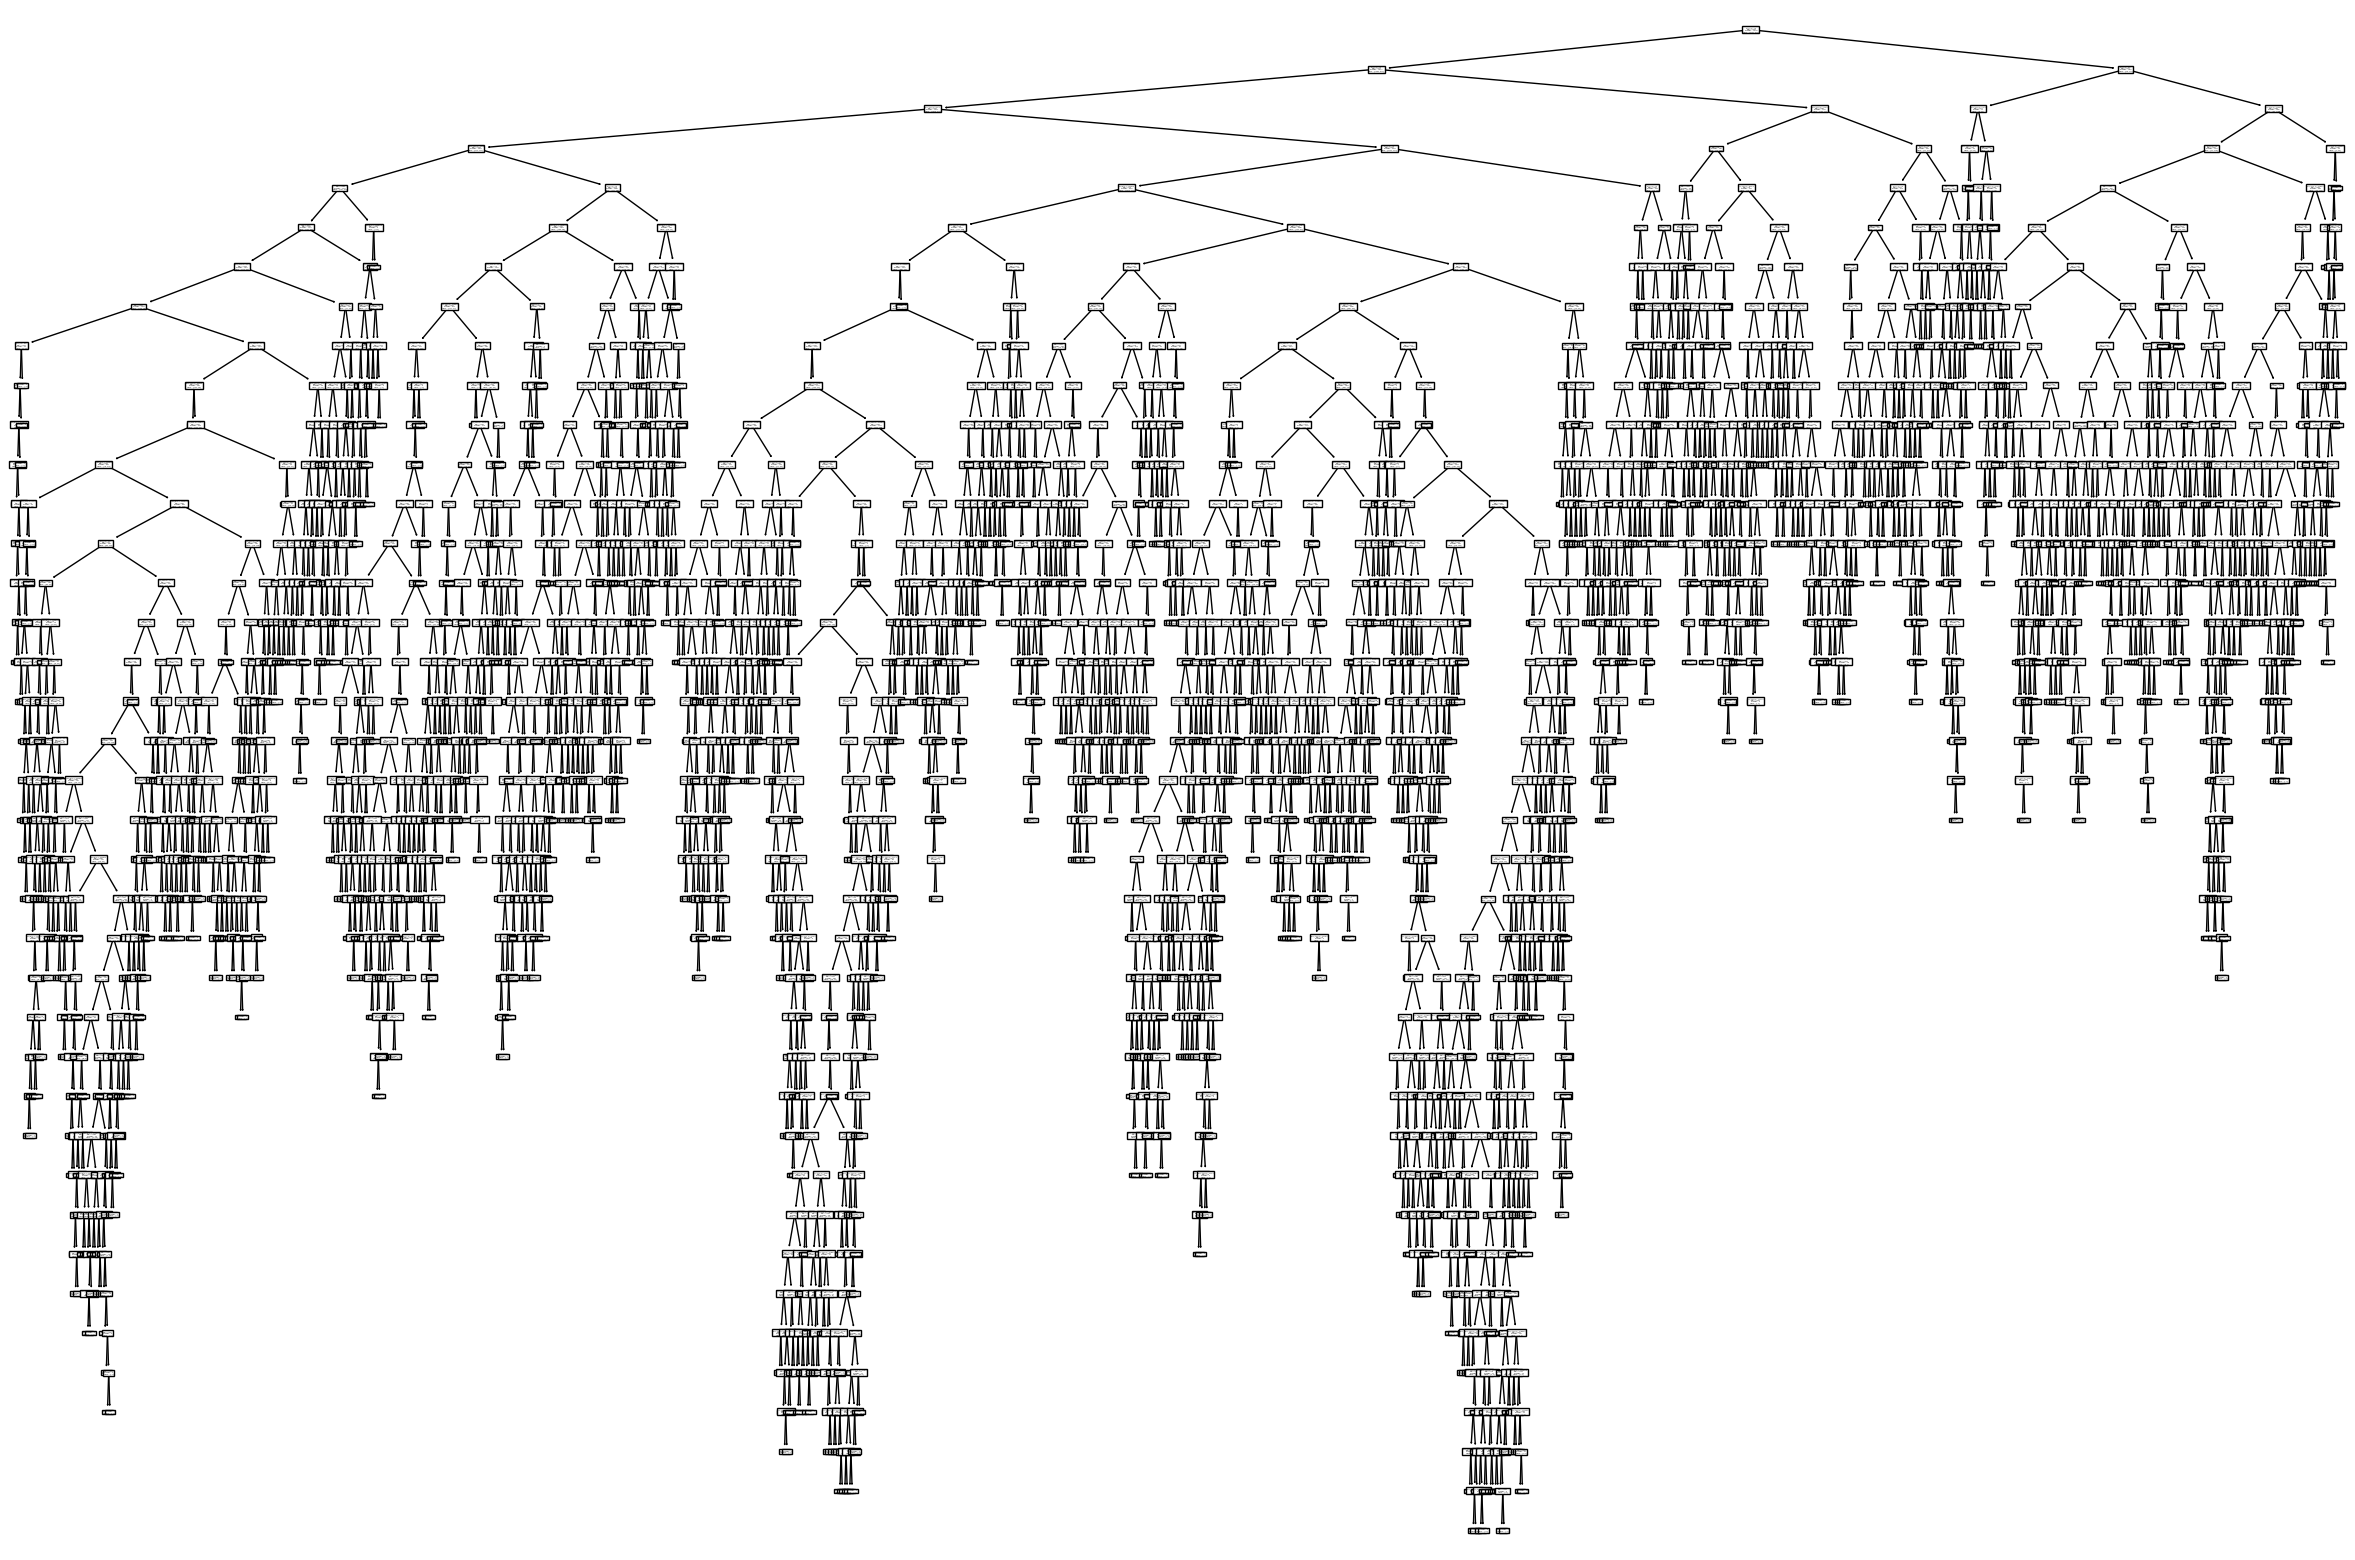

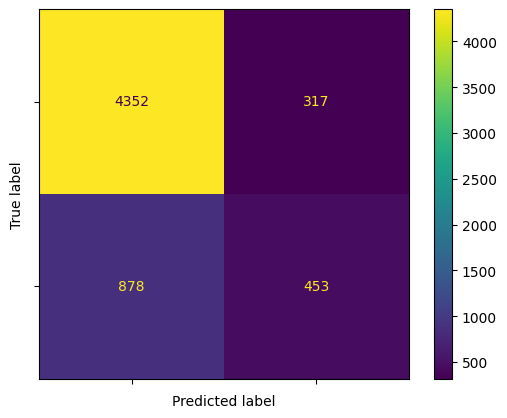

In [18]:
#Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

bagg = BaggingClassifier(n_estimators = 12)
bagg.fit(X_train, y_train)


plt.figure(figsize=(30, 20))
plot_tree(bagg.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bagg.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bagg.predict(X_test)))


c1=classification_report(y_test, bagg.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bagg.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()

# AdaBoost Classifier

Train data accuracy: 0.8189015751312609
Test data accuracy: 0.8145
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4669
           1       0.66      0.34      0.45      1331

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.81      0.79      6000



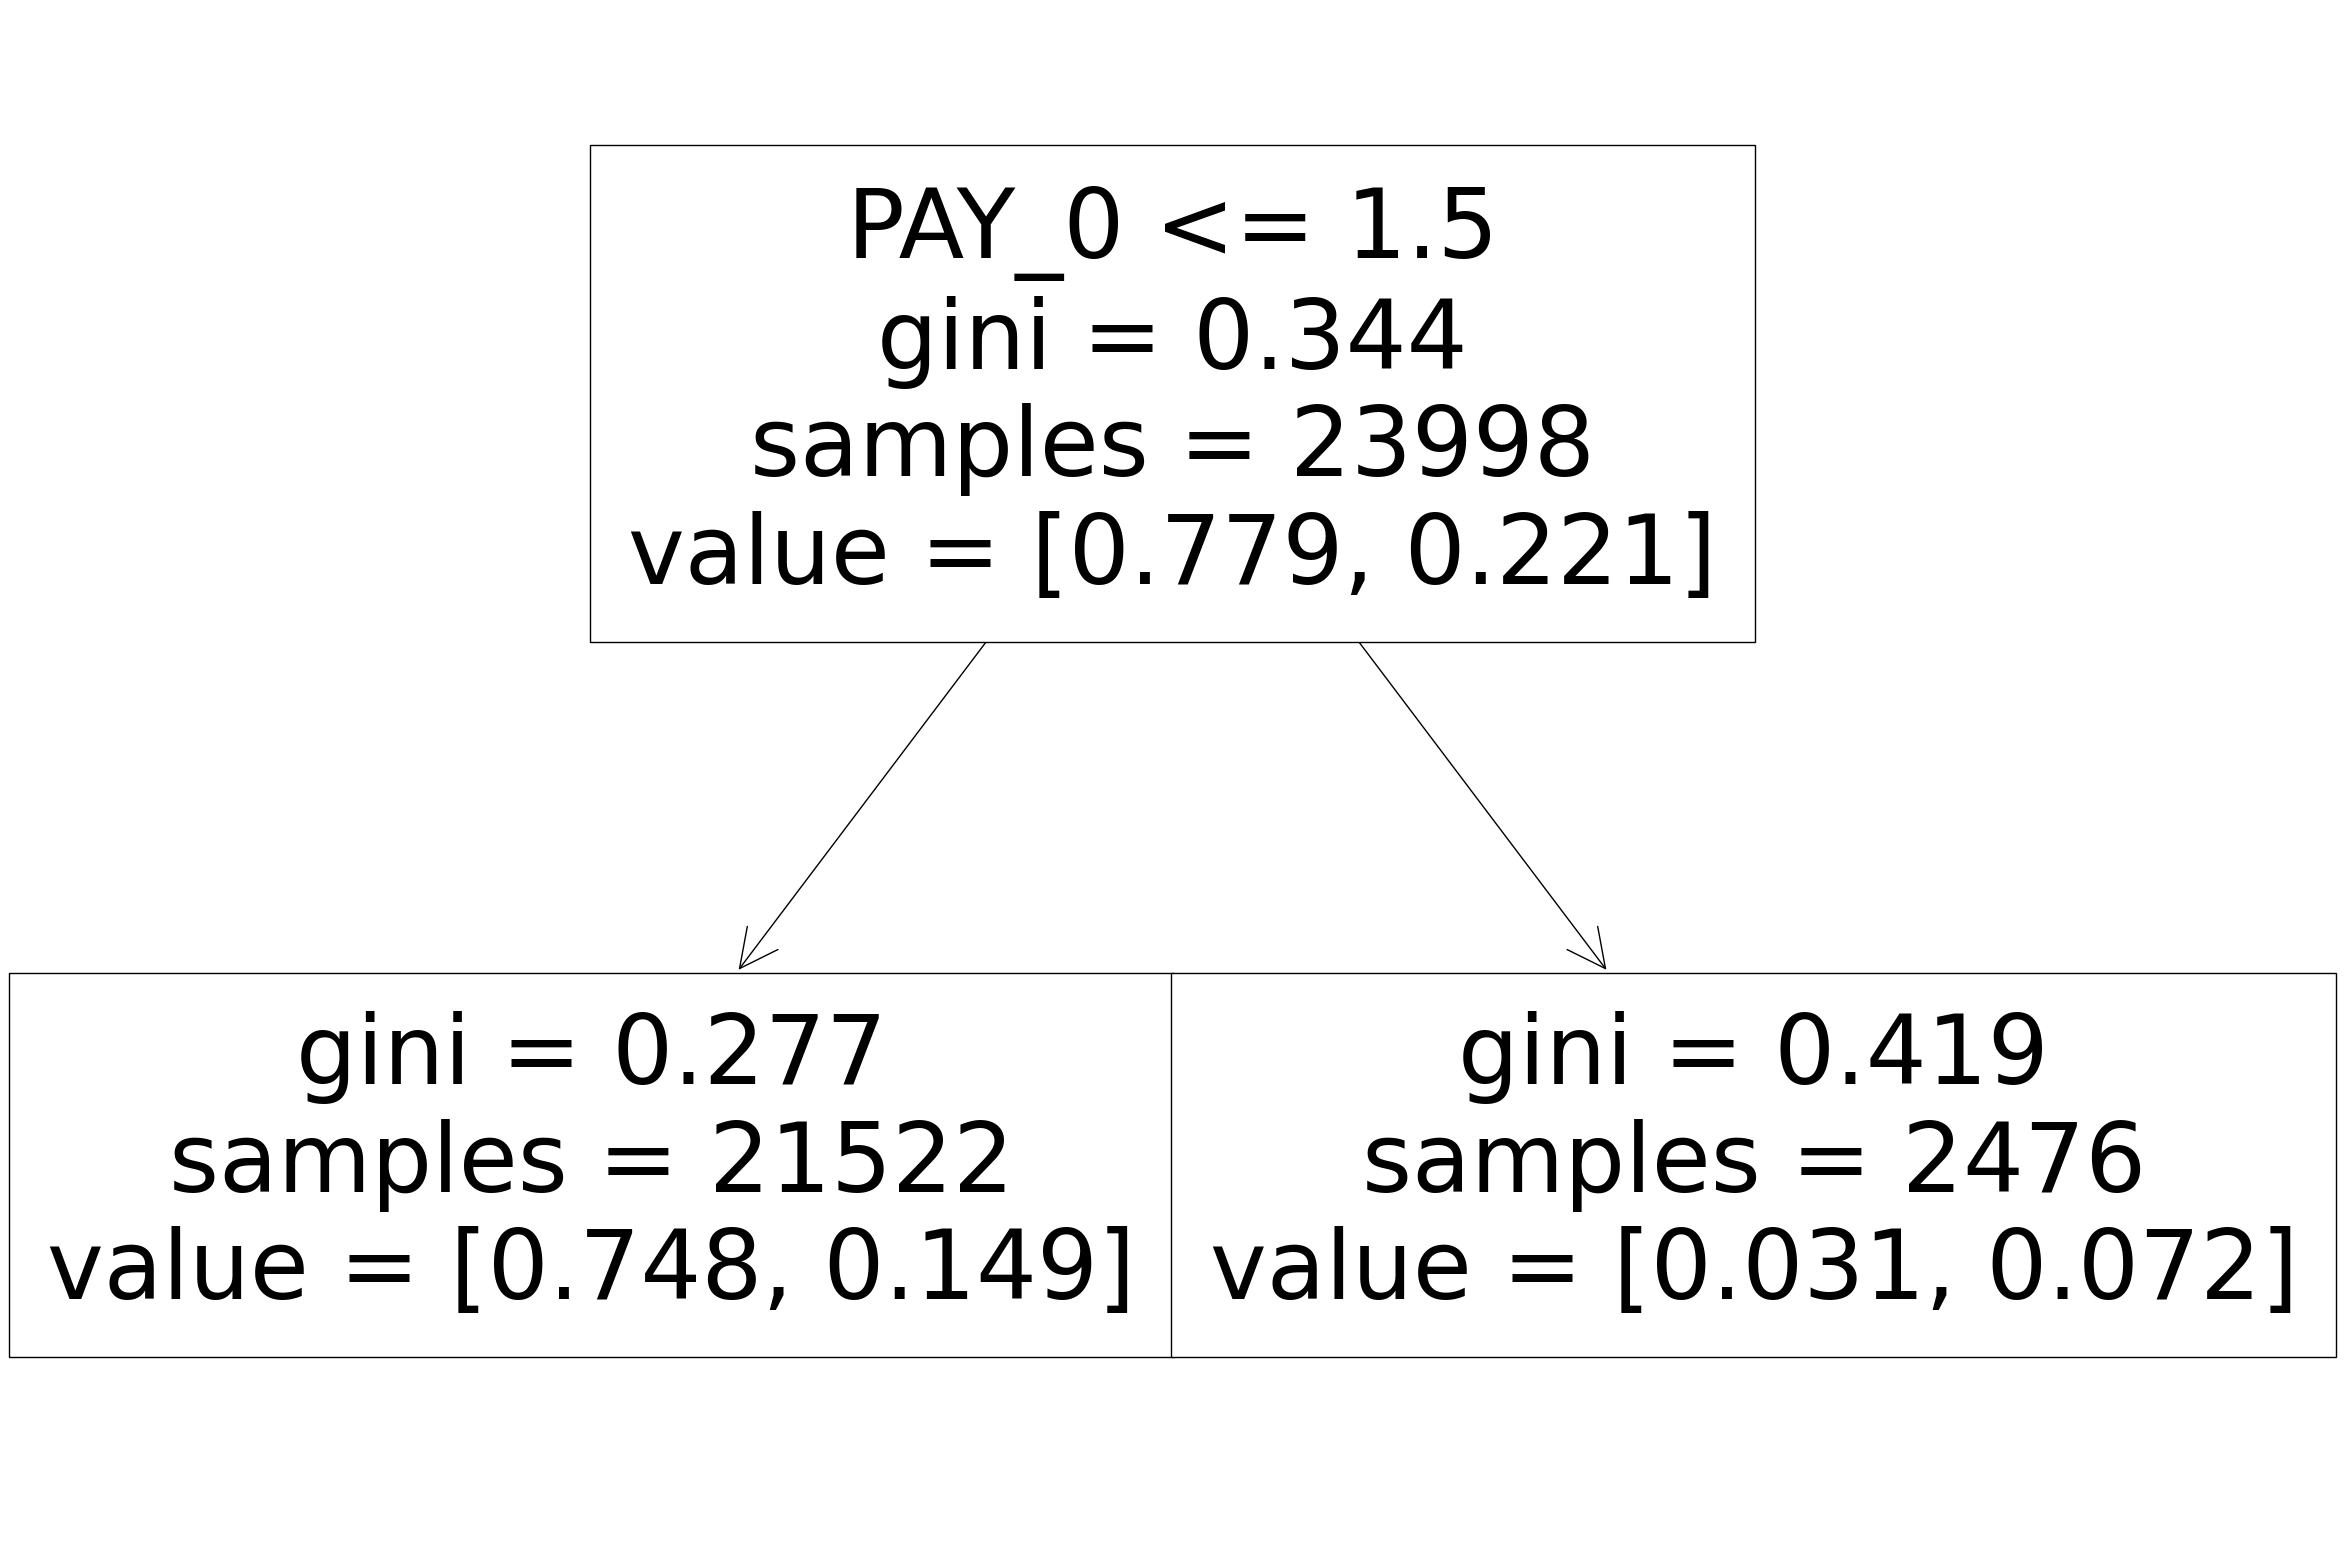

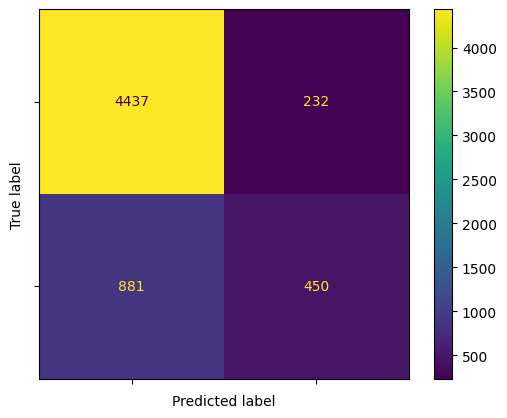

In [19]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)

plt.figure(figsize=(30, 20))
plot_tree(ada.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = ada.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = ada.predict(X_test)))


c1=classification_report(y_test, ada.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, ada.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()


# Naive bayes classifier

Train data accuracy: 0.771230935911326
Test data accuracy: 0.7681666666666667
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4669
           1       0.48      0.51      0.49      1331

    accuracy                           0.77      6000
   macro avg       0.67      0.68      0.67      6000
weighted avg       0.77      0.77      0.77      6000



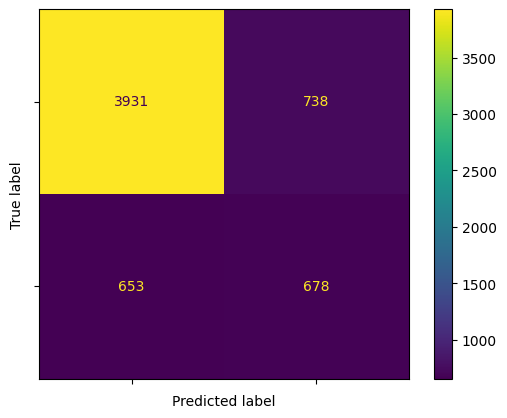

In [20]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bnb.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bnb.predict(X_test)))


c1=classification_report(y_test, bnb.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bnb.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()


# Random Forest Classifier

Train data accuracy: 0.9721643470289191
Test data accuracy: 0.7781666666666667
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4669
           1       0.50      0.36      0.42      1331

    accuracy                           0.78      6000
   macro avg       0.67      0.63      0.64      6000
weighted avg       0.76      0.78      0.76      6000



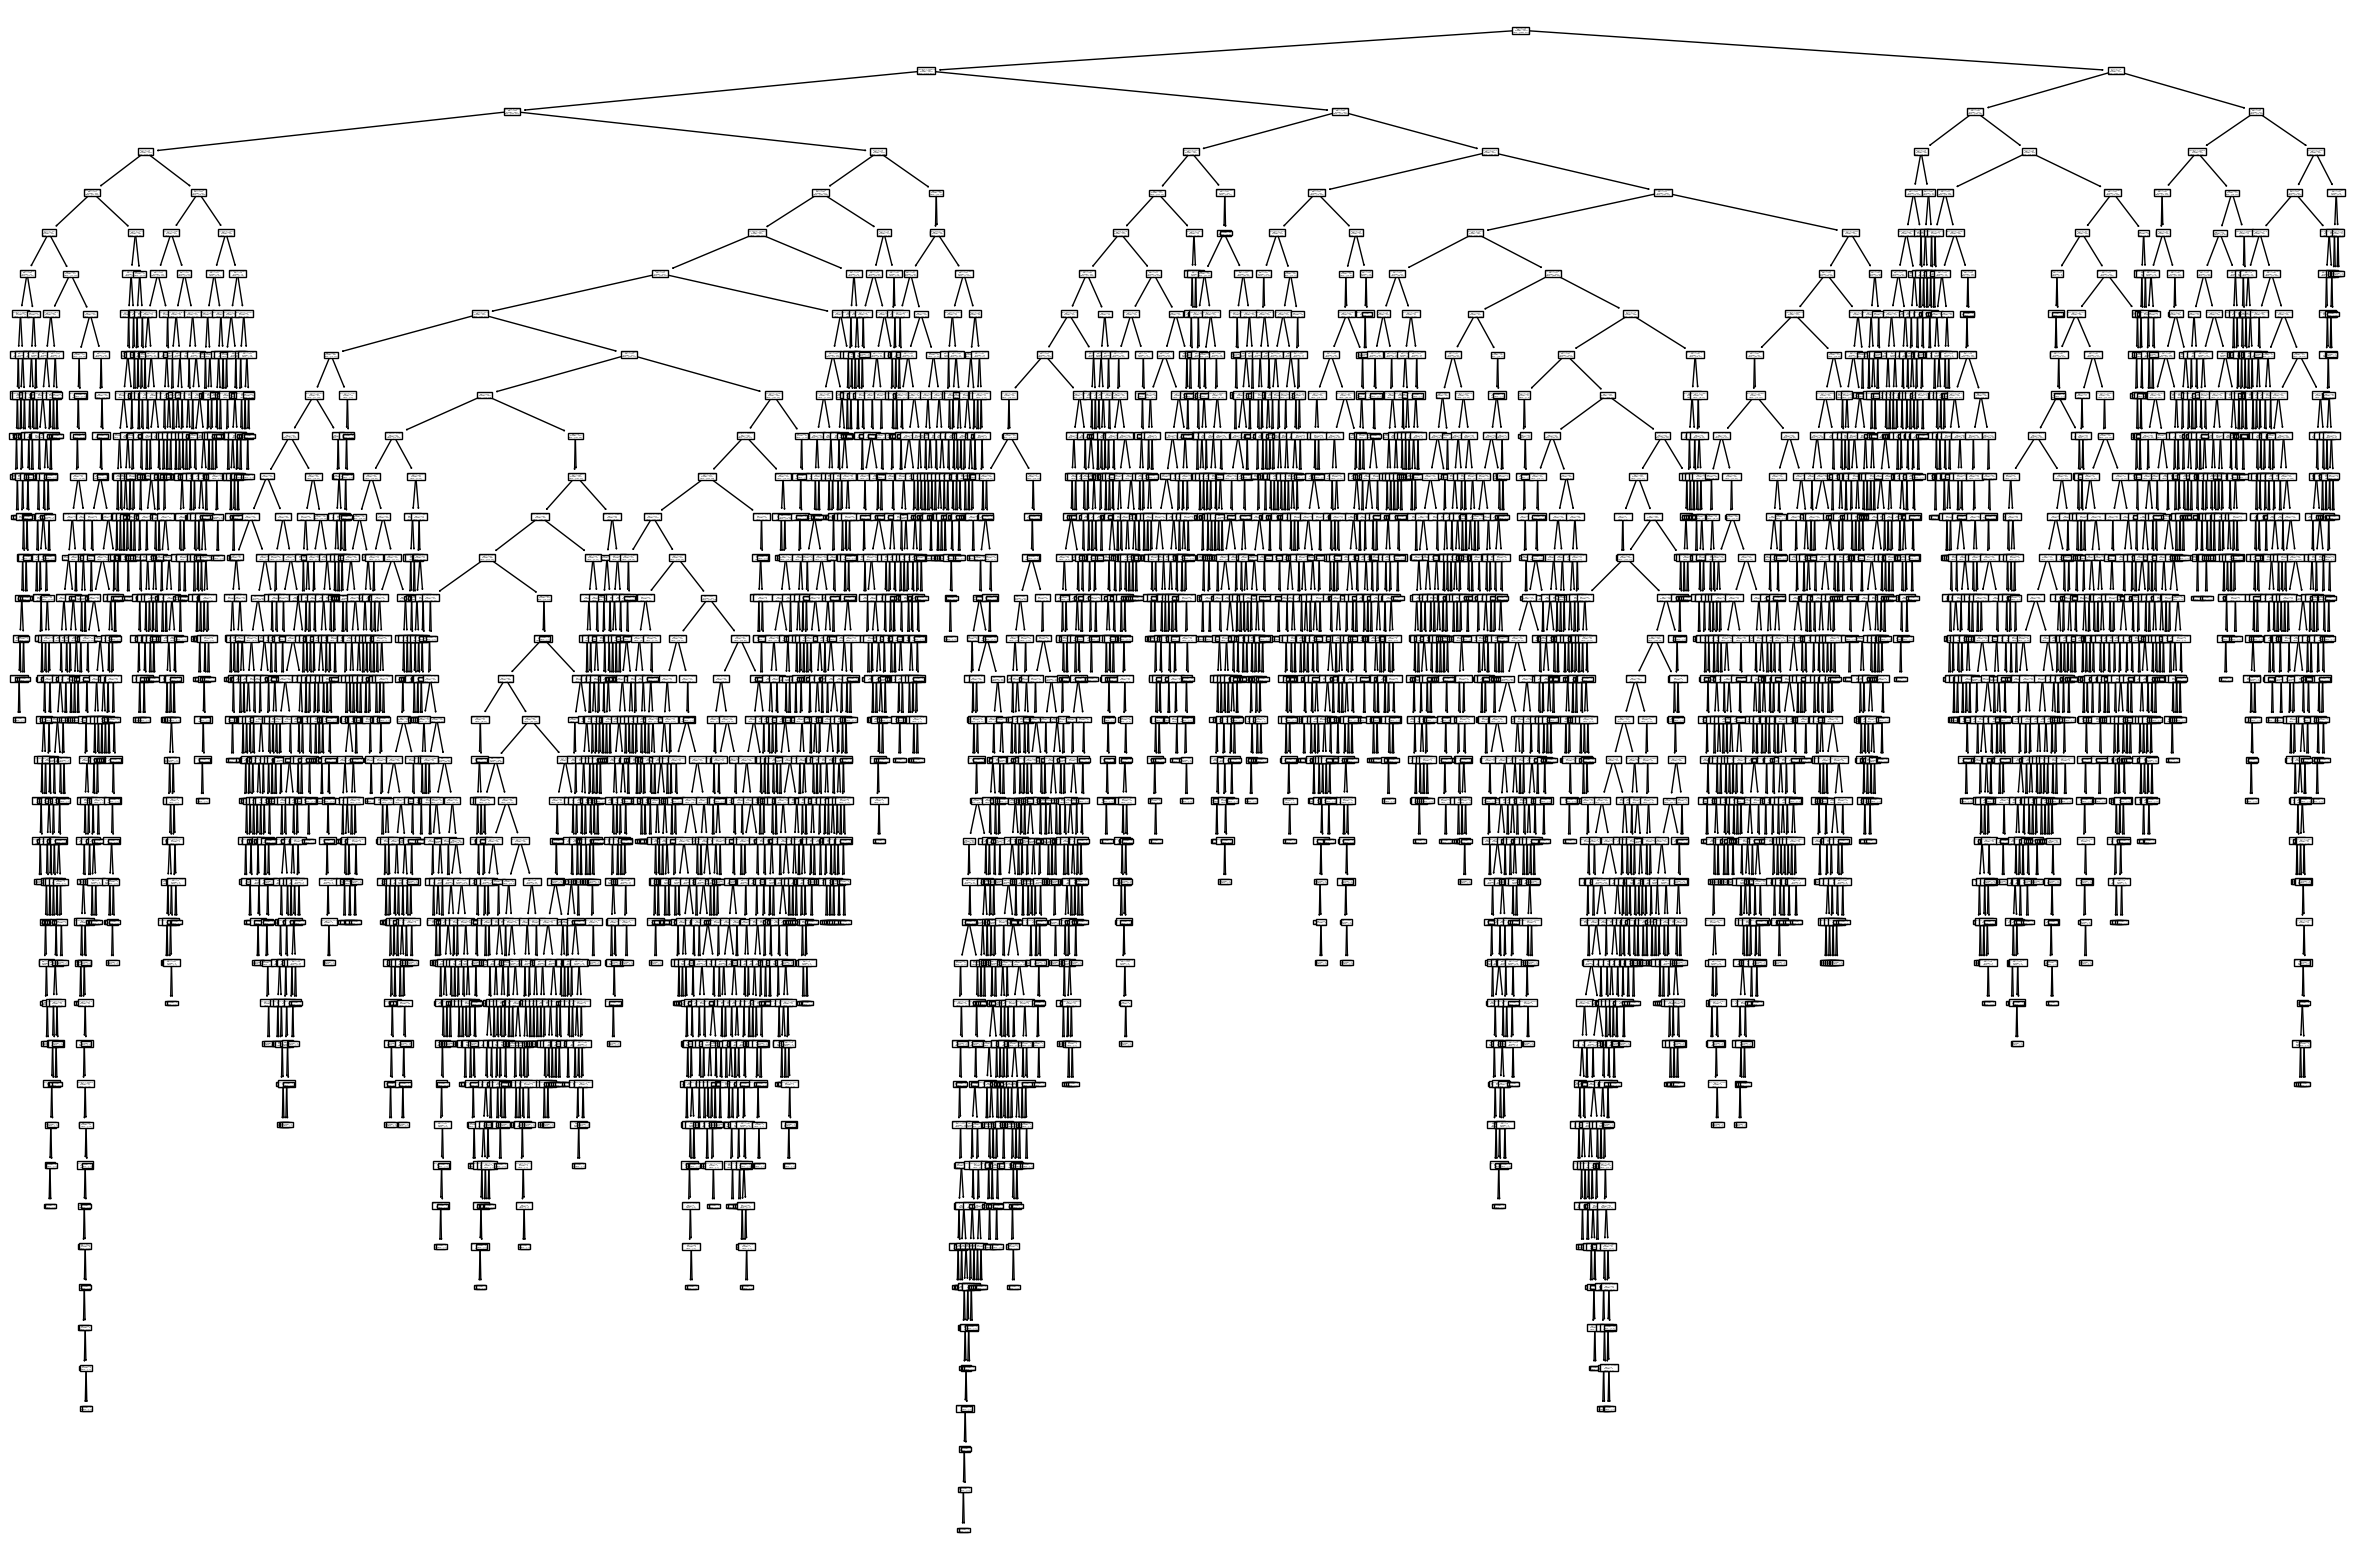

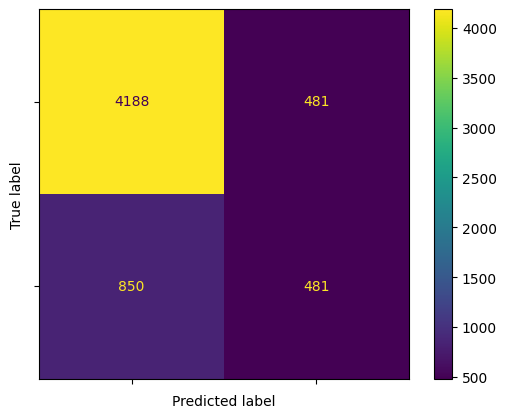

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train,y_train)

plt.figure(figsize=(30, 20))
plot_tree(rf.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = rf.predict(X_test)))


c1=classification_report(y_test, rf.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,rf.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()


# Support Vector Machine

Train data accuracy: 0.9999166597216435
Test data accuracy: 0.7781666666666667
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4669
           1       0.00      0.00      0.00      1331

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



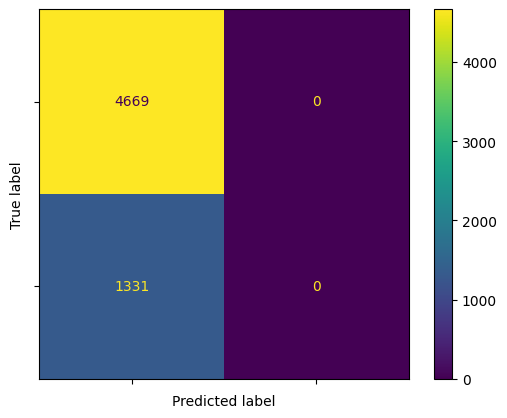

In [22]:
#SVM

from sklearn.svm import SVC
sv=SVC(gamma='auto')
sv.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = sv.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = sv.predict(X_test)))


c1=classification_report(y_test, sv.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, sv.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()

# Stochastic gradient descent

Train data accuracy: 0.7791899324943745
Test data accuracy: 0.779
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4669
           1       0.62      0.01      0.02      1331

    accuracy                           0.78      6000
   macro avg       0.70      0.50      0.45      6000
weighted avg       0.74      0.78      0.69      6000



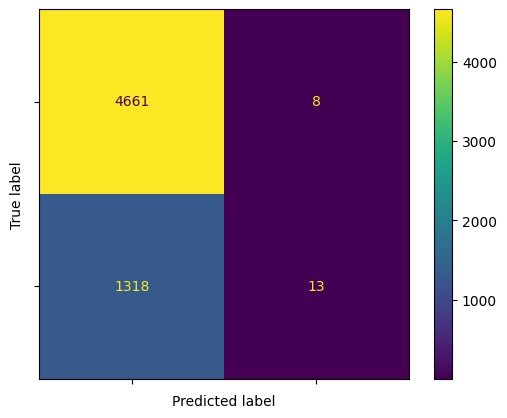

In [24]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000)
model.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = model.predict(X_test)))


c1=classification_report(y_test, model.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()

# XgBoost classifier

In [25]:
pip install xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Train data accuracy: 0.8307775647970664
Test data accuracy: 0.8193333333333334
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4669
           1       0.67      0.37      0.48      1331

    acc

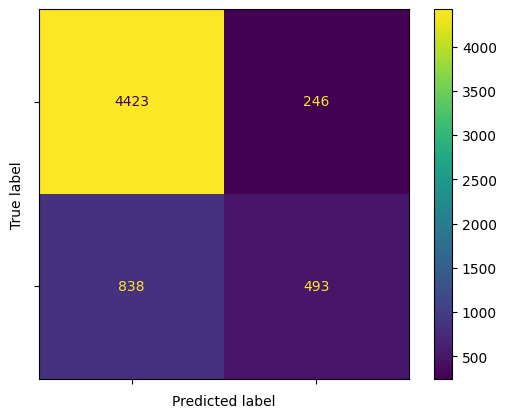

In [26]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=2)
model.fit(X_train, y_train)
print(model)


print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = model.predict(X_test)))


c1=classification_report(y_test, model.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()



# Grid Search for BaggingClassifier

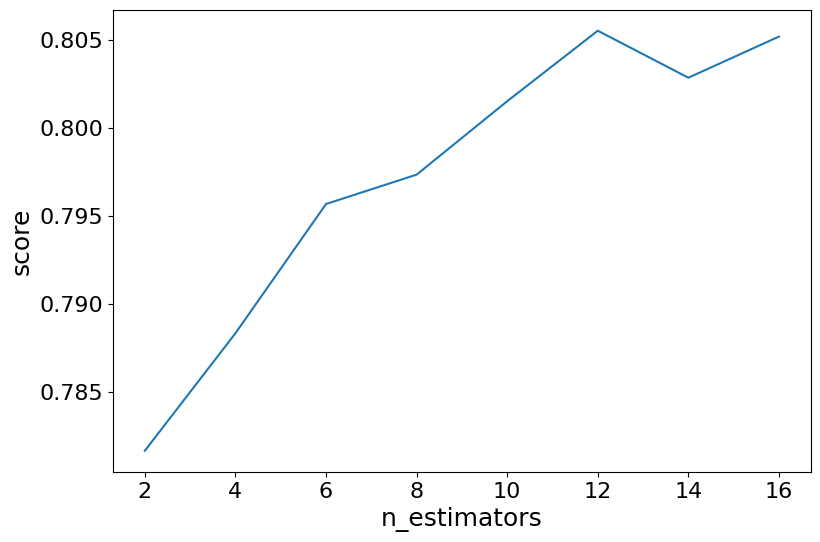

Train data accuracy: 0.9860405033752813
Test data accuracy: 0.8058333333333333
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4669
           1       0.61      0.35      0.45      1331

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.78      0.81      0.79      6000



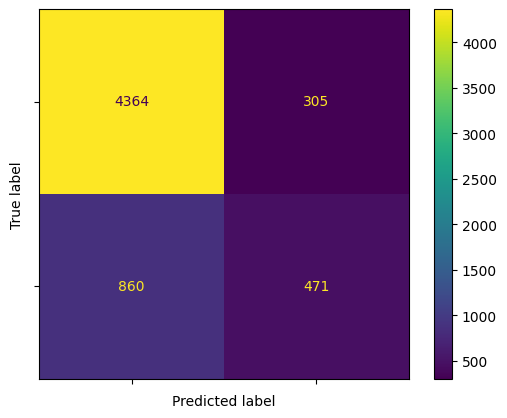

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()


#The curve shows that the highest accuracy achieves at n_estimators = 12


bagg = BaggingClassifier(n_estimators = 12)
bagg.fit(X_train, y_train)


print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bagg.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bagg.predict(X_test)))


c1=classification_report(y_test, bagg.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bagg.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()

# Grid Search for Logistic Regression

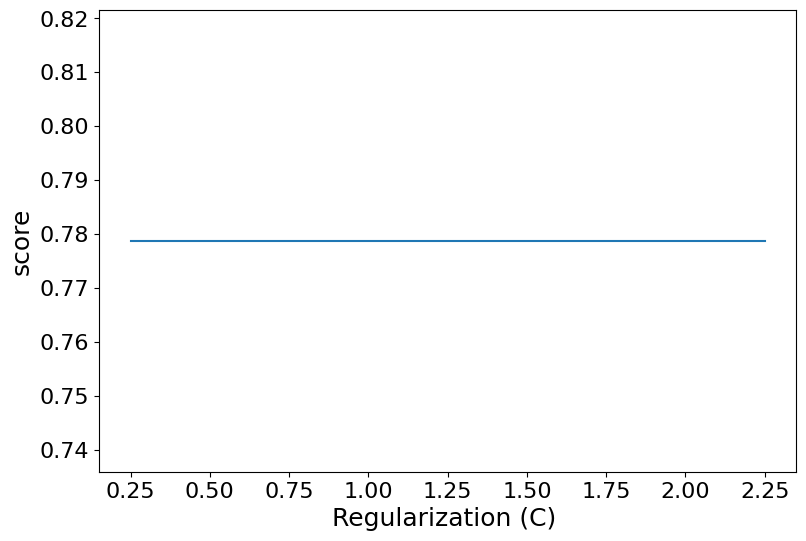

Train data accuracy: 0.7788982415201267
Test data accuracy: 0.7781666666666667
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4669
           1       0.00      0.00      0.00      1331

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



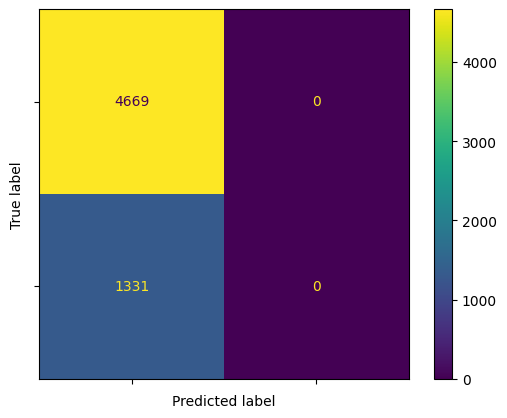

In [29]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression



logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25] #default value for C = 1

scores = []

for choice in C:
    logit.set_params(C=choice)
    logit.fit(X, y)
    scores.append(logit.score(X, y))

# Generate the plot of scores against C
plt.figure(figsize=(9,6))
plt.plot(C, scores)

# Adjust labels and font (to make visable)
plt.xlabel("Regularization (C) ", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()


#The curve shows that the highest accuracy achieves at C=2
logr = LogisticRegression(max_iter = 10000)
logr.set_params(C=2)
logr.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = logr.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = logr.predict(X_test)))


c1=classification_report(y_test, logr.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, logr.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()
